In [1]:
# Para iniciar siempre importamos las librerias que vamos a usar.
import re
from re import sub
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from html.parser import HTMLParser
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
import seaborn as sns
import missingno as msno
import geopandas as gpd
import math
import time
from scipy.spatial.distance import pdist, squareform

In [84]:
# importamos el archivo 
df = pd.read_csv('OnlineRetail.csv', header= 0, encoding="iso-8859-1")

In [85]:
# Visualizamos el dataset
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [86]:
# Visualizamos las 20 primeas filas
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [87]:
# Hacemos un describe para ver sus valores
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [88]:
# Visualizamos los datos faltantes
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<AxesSubplot:>

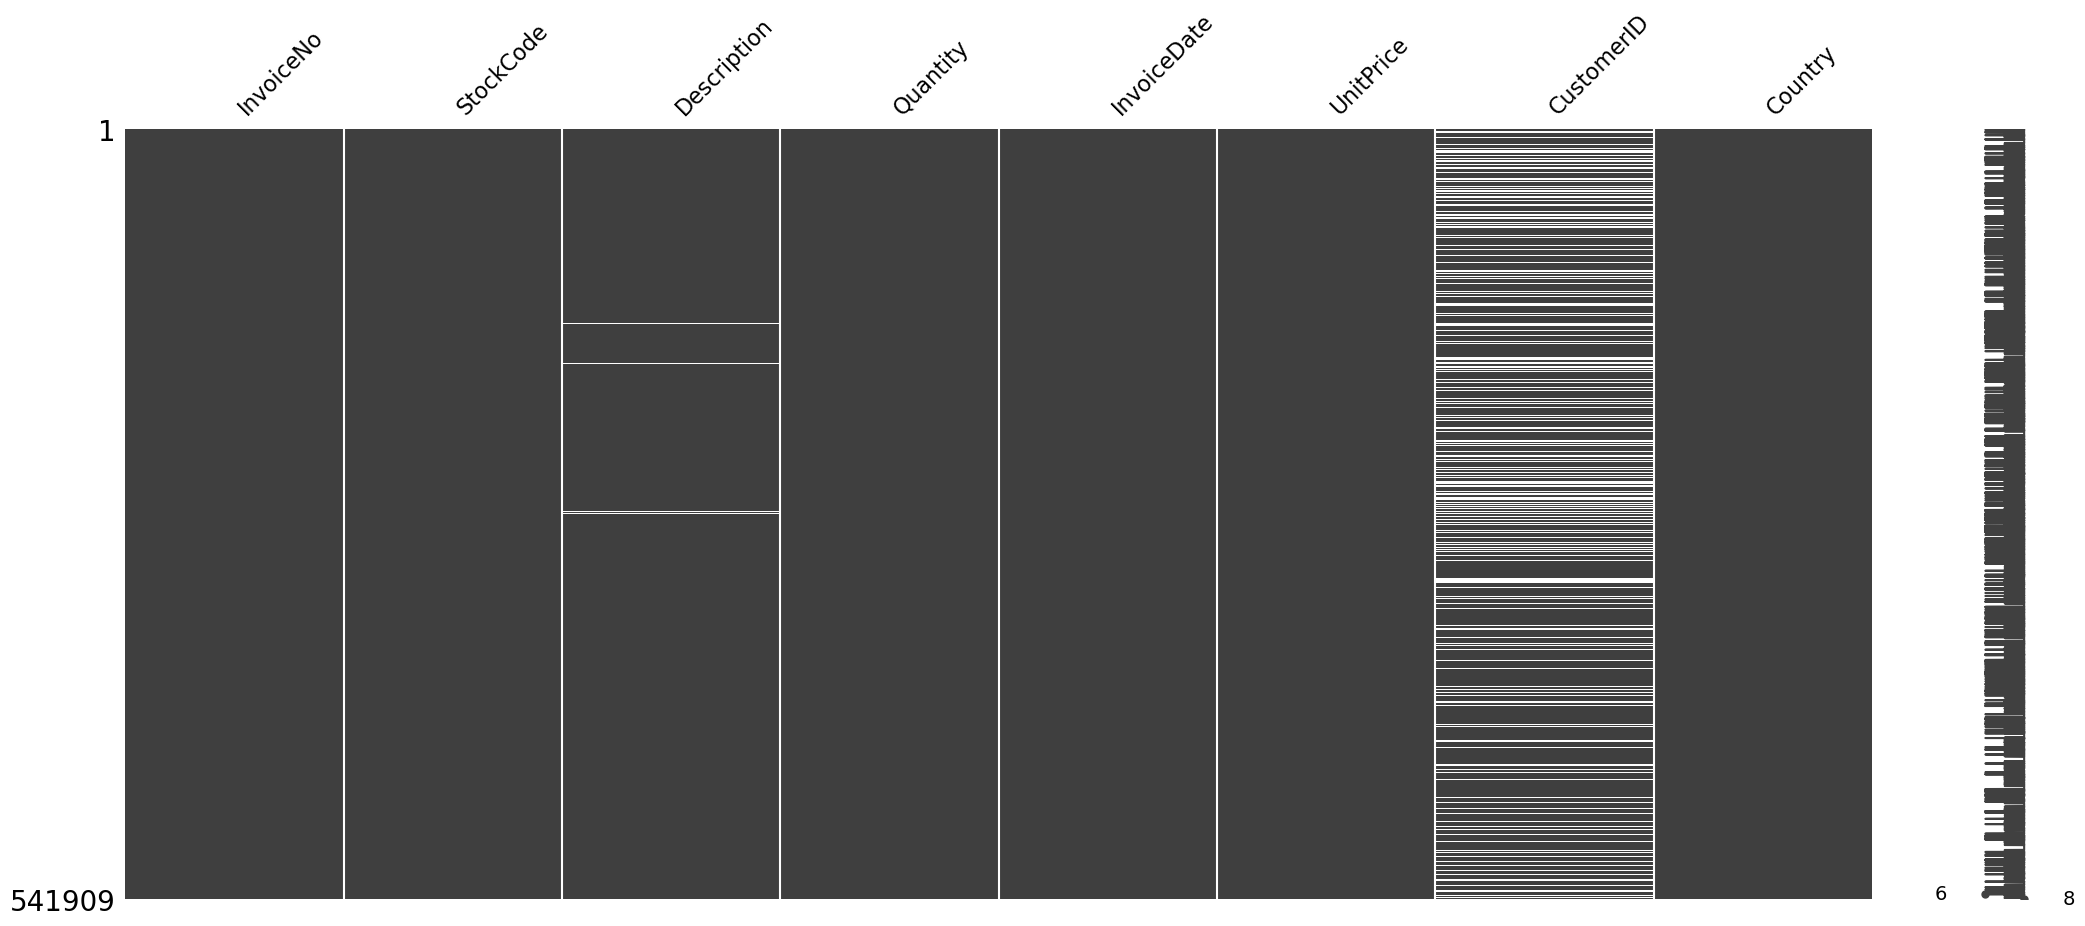

In [89]:
msno.matrix(df)

In [90]:
# Eliminamos los nan de las columnas.
df = df.dropna(axis = 0)

In [91]:
# Hacemos un reseset de los index
df = df.reset_index(drop=True)

<AxesSubplot:>

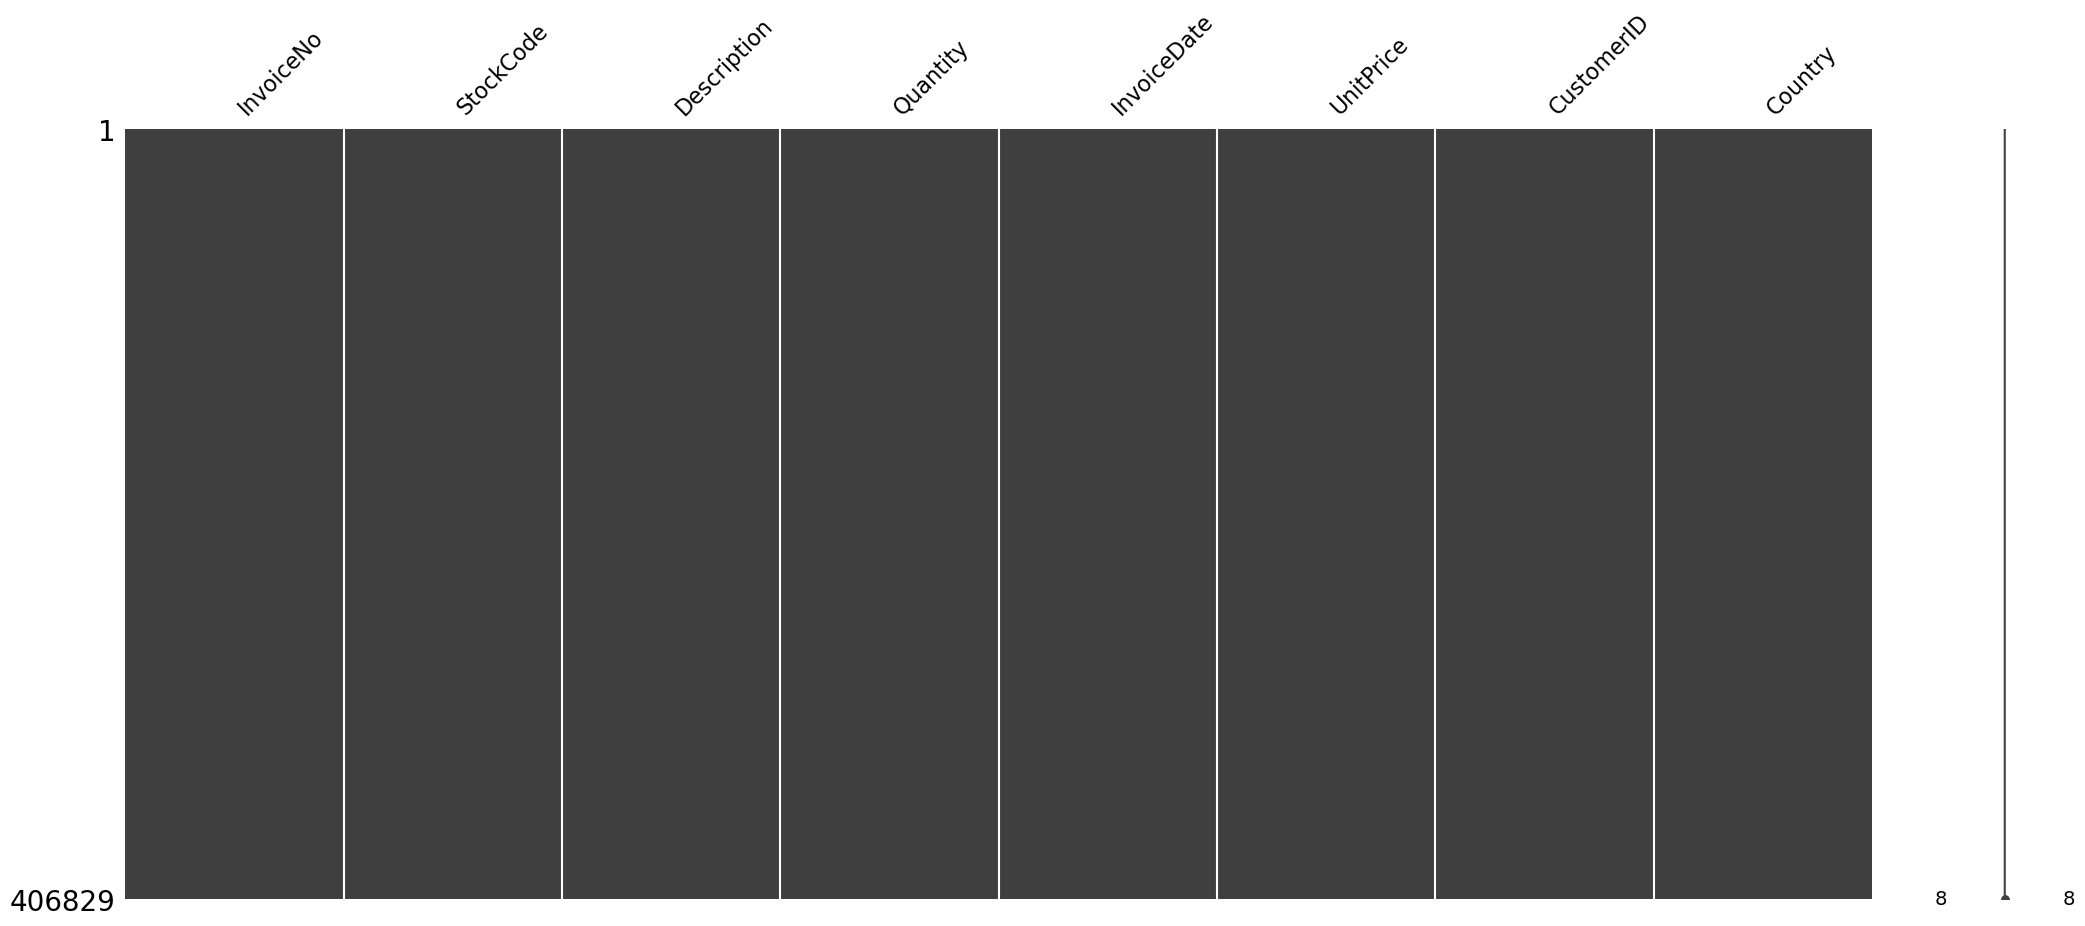

In [92]:
# Visualizamos 
msno.matrix(df)

In [93]:
# Vemos ahora que ya se eliminaron los datos faltantes o NAN.
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [94]:
# Hacemos un value count de la columna de los paises para visualizarlos en su totalidad.
df['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [95]:
# Reemplazamos los nombres de los paises que esten mal escrito para poder hacer el merge con geopandas.

#df = df["Country"].replace({"RSA": "Russia", "EIRE": "Ireland"})
df.loc[df['Country'] == 'EIRE', 'Country'] = 'Ireland'
df.loc[df['Country'] == 'RSA', 'Country'] = 'Russia'
df.loc[df['Country'] == 'USA', 'Country'] = 'United States of America'

In [96]:
# Hacemos un value count de la columna de los paises para visualizarlos en su totalidad.
df['Country'].value_counts()

United Kingdom              361878
Germany                       9495
France                        8491
Ireland                       7485
Spain                         2533
Netherlands                   2371
Belgium                       2069
Switzerland                   1877
Portugal                      1480
Australia                     1259
Norway                        1086
Italy                          803
Channel Islands                758
Finland                        695
Cyprus                         622
Sweden                         462
Austria                        401
Denmark                        389
Japan                          358
Poland                         341
United States of America       291
Israel                         250
Unspecified                    244
Singapore                      229
Iceland                        182
Canada                         151
Greece                         146
Malta                          127
United Arab Emirates

In [97]:
# Ordenamos la columna de country en forma ascendente.
manf_sort = pd.get_dummies(df["Country"]).sum().sort_values(ascending = False)

C:\Users\jesus\Nuevo Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


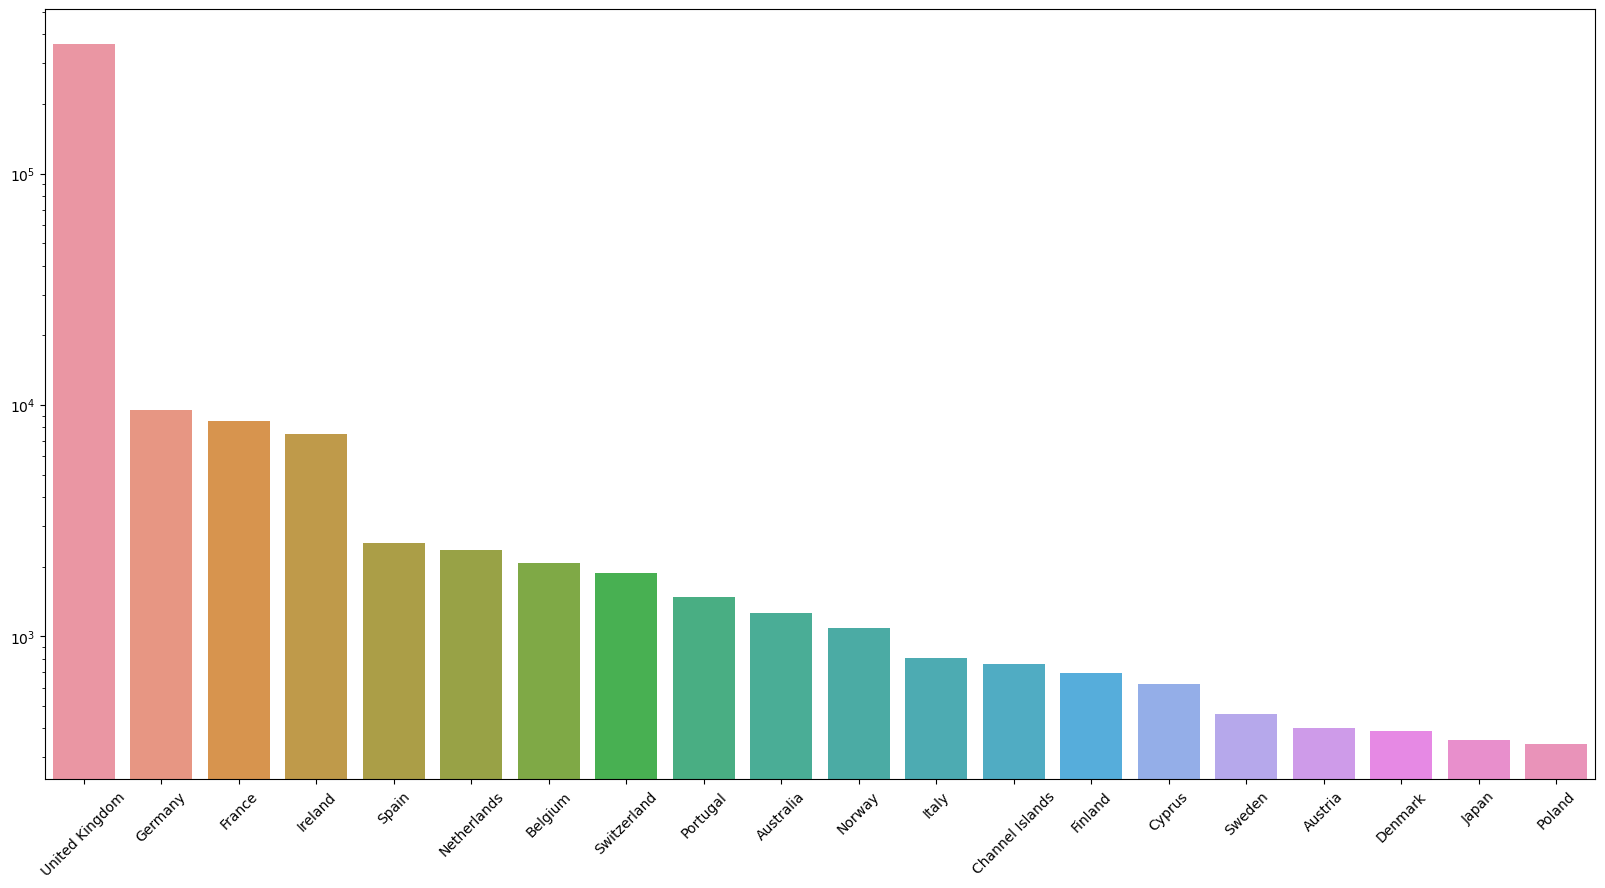

In [98]:
# Hacemos un grafico de los 20 primeros paises.
firstTwenty=manf_sort[:20]
plt.figure(figsize=(20,10))
sns.barplot(firstTwenty.index,firstTwenty.values)
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

In [99]:
# Agrupamos por categoría y sumamos las cantidades
sumPaises = df.groupby('Country')['Quantity'].sum()

In [100]:
# Visualizamos la sumatoria por paises.
sumPaises

Country
Australia                     83653
Austria                        4827
Bahrain                         260
Belgium                       23152
Brazil                          356
Canada                         2763
Channel Islands                9479
Cyprus                         6317
Czech Republic                  592
Denmark                        8188
European Community              497
Finland                       10666
France                       109848
Germany                      117448
Greece                         1556
Iceland                        2458
Ireland                      136329
Israel                         3990
Italy                          7999
Japan                         25218
Lebanon                         386
Lithuania                       652
Malta                           944
Netherlands                  200128
Norway                        19247
Poland                         3653
Portugal                      16044
Russia              

In [101]:
# Lo convertimos en un dataframe
df2 = pd.DataFrame(sumPaises)

In [102]:
# Lo visualizamos.
df2

,Quantity
Country,
Australia,83653
Austria,4827
Bahrain,260
Belgium,23152
Brazil,356
Canada,2763
Channel Islands,9479
Cyprus,6317
Czech Republic,592


In [103]:
#df2 = df2.drop(["Unspecified"], axis=0, inplace=True)
#df2.loc[df2['Country'] == 'USA', 'Country'] = 'United States of America'

In [104]:
# Lee los datos de los límites de los países
paises = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Ver el listado completo
pd.set_option('display.max_rows', 200)
paises

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,8.899530e+05,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,5.800546e+07,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,6.032530e+05,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,3.758926e+07,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,1.851393e+07,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,3.358065e+07,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,8.776109e+06,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,2.706256e+08,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,4.493871e+07,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [105]:
# Unir los datos de los países con los datos de ventas por país
paises_ventas = paises.merge(df2, left_on='name', right_on='Country')
paises_ventas

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Quantity
0,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2763
1,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1034
2,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",352
3,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",19247
4,211049527.0,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",356
5,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",109848
6,9053300.0,Asia,Israel,ISR,394652,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",3990
7,6855713.0,Asia,Lebanon,LBN,51991,"POLYGON ((35.82110 33.27743, 35.55280 33.26427...",386
8,9770529.0,Asia,United Arab Emirates,ARE,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",982
9,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",35637


In [106]:
# Creamos una nueva columna para mostrar el valor "Quantity" en escala logaritmica.
paises_ventas["log10Y"] = paises_ventas["Quantity"].apply(lambda x: math.log10(x))
paises_ventas

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Quantity,log10Y
0,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2763,3.441381
1,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1034,3.014521
2,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",352,2.546543
3,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",19247,4.284363
4,211049527.0,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",356,2.551450
5,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",109848,5.040792
6,9053300.0,Asia,Israel,ISR,394652,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",3990,3.600973
7,6855713.0,Asia,Lebanon,LBN,51991,"POLYGON ((35.82110 33.27743, 35.55280 33.26427...",386,2.586587
8,9770529.0,Asia,United Arab Emirates,ARE,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",982,2.992111
9,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",35637,4.551901


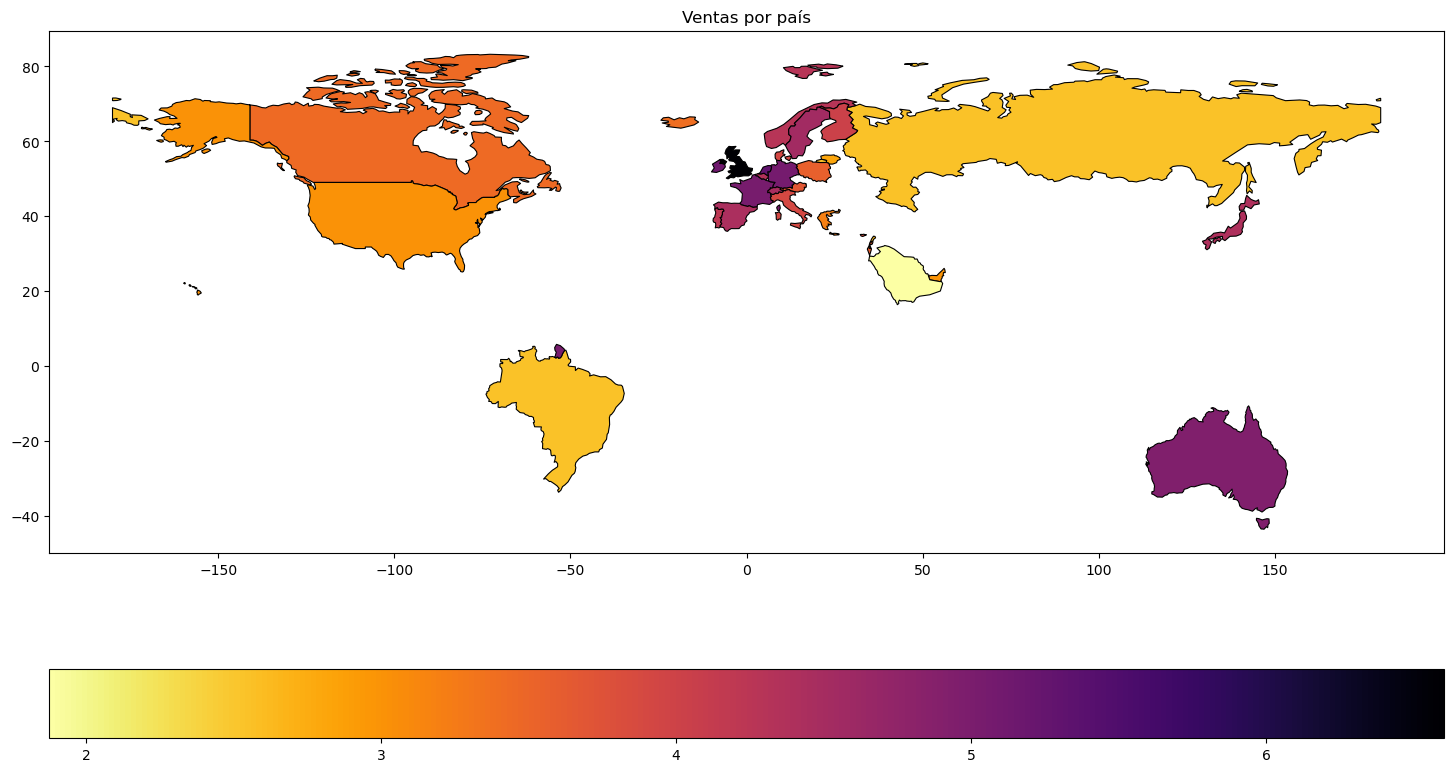

In [107]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(18, 10))

# Dibujar los países en el mapa y colorearlos según las ventas
paises_ventas.plot(ax=ax, column='log10Y', cmap='inferno_r', linewidth=0.8, edgecolor='black', legend=True,  legend_kwds={'orientation': "horizontal"})

# Añadir un título al mapa
ax.set_title('Ventas por país')

# Mostrar el mapa
plt.show()

In [108]:
df["Country"].replace({"RSA": "Russia", "EIRE": "Ireland"})

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
406824            France
406825            France
406826            France
406827            France
406828            France
Name: Country, Length: 406829, dtype: object

In [109]:
# Vizualizamos los articulos y los mas vendidos.
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: Description, Length: 3896, dtype: int64

In [110]:
# Vemos la cantida de clientes que hay.
df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [111]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [112]:
# Convertir celdas de texto en celdas de tipo datetime
df['fecha'] = pd.to_datetime(df['InvoiceDate'])


In [113]:
# Verificamos el tipo de dato de la columna FECHA.
df['fecha'].dtype

dtype('<M8[ns]')

In [114]:
# Separamos la hora en una columan diferente de la fecha
df['hora'] = df['fecha'].dt.hour

#df['hora'] = [d.date() for d in df['fecha']]
#df['hora'] = [d.time() for d in df['fecha']]
#df['fecha'] = df['InvoiceDate'].dt.date
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,fecha,hora
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,8
...,...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09 12:50:00,12
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09 12:50:00,12
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,12
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,12


In [115]:
# Vemos el tipo de valor de la columna HORA.
df["hora"].dtype

dtype('int64')

In [116]:
# Visualizamos los valores de la columna Hora.
df["hora"].value_counts()

12    73342
13    65062
14    55075
11    50249
15    46220
10    38951
16    24997
9     22464
17    13734
8      8792
19     3511
18     3137
20      871
7       383
6        41
Name: hora, dtype: int64

In [117]:
# Ordenamos la columna de hora en forma ascendente.
manf_sortH = pd.get_dummies(df["hora"]).sum().sort_values(ascending = False)

C:\Users\jesus\Nuevo Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


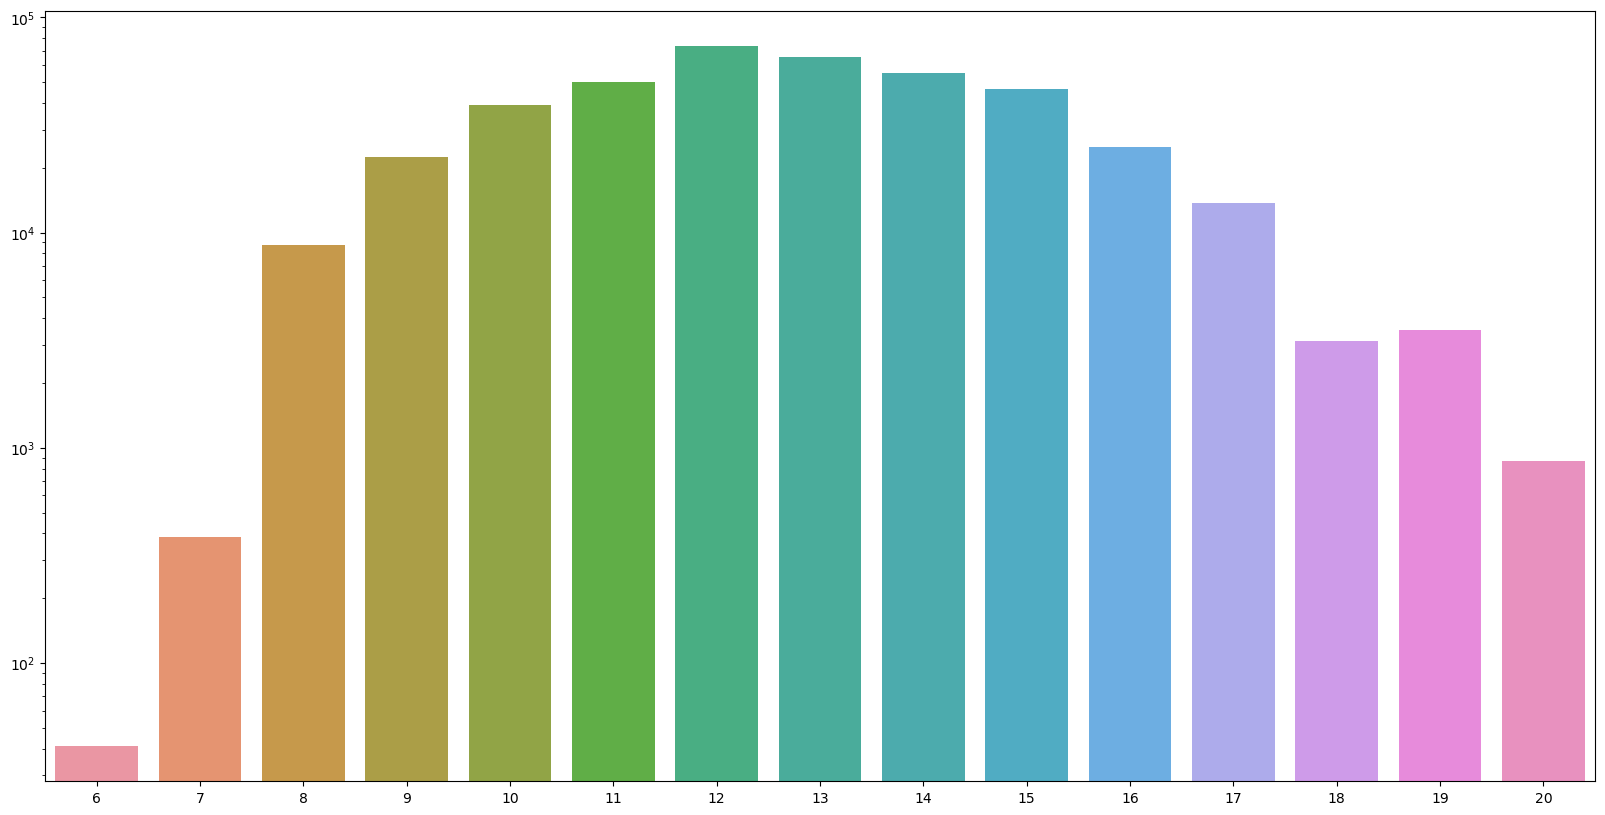

In [119]:
# Hacemos un grafico de las horas donde se hicieron las compras.
firstTwenty=manf_sortH[:20]
plt.figure(figsize=(20,10))
sns.barplot(firstTwenty.index,firstTwenty.values)
plt.yscale("log")
plt.show()

In [79]:
# Covertimos la columna hora a datatime.
#df['hora'] = pd.to_datetime(df['hora'])
# Rectificamos si hizo el cambio de la columna Hora a datatime
df["hora"].dtype

dtype('<M8[ns]')

In [80]:
Horas = pd.date_range(start=df['hora'].min(), end=df['hora'].max())
Horas

DatetimeIndex(['1970-01-01 00:00:00.000000006'], dtype='datetime64[ns]', freq='D')

In [81]:
# Creamos un DataFrame con las fechas del rango
dfHoras = pd.DataFrame({'hora': Horas})
dfHoras

,hora
0,1970-01-01 00:00:00.000000006


In [63]:
customer_item_matrix = df.pivot_table(index='CustomerID',columns='StockCode',values='Quantity',aggfunc='sum')
customer_item_matrix

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


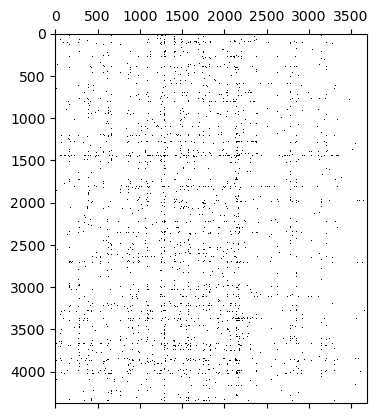

In [64]:
plt.spy(customer_item_matrix)
plt.show()

In [69]:
# Reemplazamos NaNs con ceros (0)
userItemZero = customer_item_matrix.fillna(0)

userItemZero

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
from sklearn.metrics.pairwise import cosine_similarity

# User to User Similarity Matrix
userUser = pd.DataFrame(cosine_similarity(userItemZero))

userUser

,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.000000,0.011921,0.074510,0.108942
2,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.0,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.000000,0.000000,0.175170,0.110096
3,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.0,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.000000,0.014689,0.065295,0.022576
4,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.0,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,0.0,0.037236,0.000000,0.000000,0.000000,0.000000,0.0,0.002707,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.043042,1.000000,0.098363,0.000000,0.000000,0.000000
4368,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000435,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.098363,1.000000,0.000000,0.098201,0.000000
4369,0.0,0.011921,0.000000,0.014689,0.000000,0.002966,0.0,0.000000,0.007169,0.004772,...,0.0,0.0,0.000000,-0.001372,0.000000,0.000000,0.000000,1.000000,0.003776,0.000000
4370,0.0,0.074510,0.175170,0.065295,0.019385,0.017238,0.0,0.104890,0.050042,0.063930,...,0.0,0.0,0.032142,0.070999,0.000000,0.000000,0.098201,0.003776,1.000000,0.044445


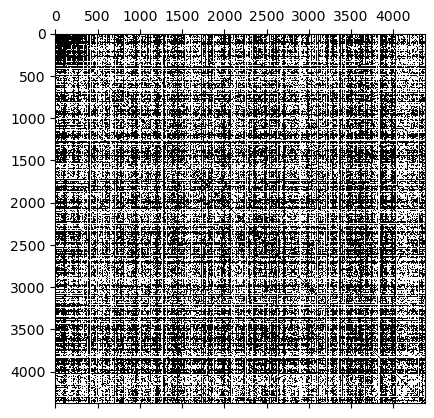

In [71]:
plt.spy(userUser)
plt.show()